In [1]:
%load_ext autoreload
%matplotlib inline
import matplotlib.pyplot as plt 
import numpy as np

from utils import df_plot, monta_df, reg_plot

BINS = 16


In [2]:
df, imagens = monta_df(BINS, '2017-07-01', '2017-07-15')
df.head()

,15.9375,31.875,47.8125,63.75,79.6875,95.625,111.5625,127.5,143.4375,159.375,175.3125,191.25,207.1875,223.125,239.0625,255.0,peso
0,45021,2811,2211,1512,1266,990,783,714,678,876,2028,2733,2034,24147,2289,2655,29688.00
1,52416,2988,1755,1536,1209,1071,1080,627,531,1053,1593,3582,3198,27351,2205,5913,29698.00
2,51429,24744,21744,20136,17346,14793,11166,8451,7152,7977,9099,8280,11994,21174,327,6090,25063.13
3,3711,5286,44343,56235,28338,18147,12201,9048,6585,6081,7611,7497,7443,41424,2859,7077,13580.00
4,66360,6669,5040,3372,2049,1497,1068,663,573,639,1200,1878,1440,6489,360,6375,22486.50


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X_train, X_test, y_train, y_test = train_test_split(
    df[df.columns[:15]], df['peso'], test_size=0.25, random_state=42)
print(df.columns)

Index([ 15.9375,   31.875,  47.8125,    63.75,  79.6875,   95.625, 111.5625,
          127.5, 143.4375,  159.375, 175.3125,   191.25, 207.1875,  223.125,
       239.0625,    255.0,   'peso'],
      dtype='object')


Mean squared error: 9643088.74
Mean absolute error: 1951.95
Median absolute error: 1233.12
Variance score: 0.86


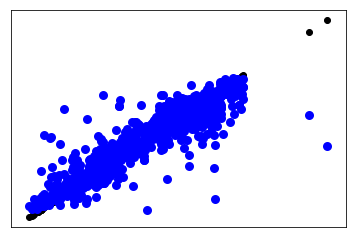

Número de dados de teste 1199


In [4]:
# Treinar modelo
forest = RandomForestRegressor(max_depth=10, random_state=0)
forest.fit(X_train, y_train)

# Plotar estatísticas do modelo e projeção real x predição
reg_plot(forest, X_test, y_test)
print('Número de dados de teste', len(X_test))

In [5]:
# Salvar resultados
from sklearn.externals import joblib
joblib.dump(forest, 'ForestPeso.pkl')
with open('histo.npy', 'wb') as out:
    np.save(out, np.array(X_train))
with open('label.npy', 'wb') as out:
    np.save(out, y_train)


In [6]:
%autoreload 2
from utils import monta_df
df_vazios, imagens_vazios = monta_df(BINS, '2017-07-01', '2017-07-15', vazio=True)

In [7]:
import pandas as pd
df_todos = pd.concat([df, df_vazios])

Mean squared error: 61401.37
Mean absolute error: 105.31
Median absolute error: 28.02
Variance score: 0.95


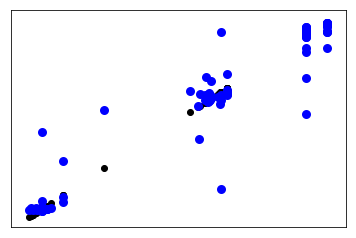

Número de dados de teste 126


In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    df_vazios[df_vazios.columns[:15]], df_vazios['peso'], test_size=0.33, random_state=42)
forest_vazios = RandomForestRegressor(max_depth=10, random_state=0)
forest_vazios.fit(X_train, y_train)
# Plotar estatísticas do modelo e projeção real x predição
reg_plot(forest_vazios, X_test, y_test)
print('Número de dados de teste', len(X_test))

Mean squared error: 9338779.10
Mean absolute error: 1927.16
Median absolute error: 1216.48
Variance score: 0.88


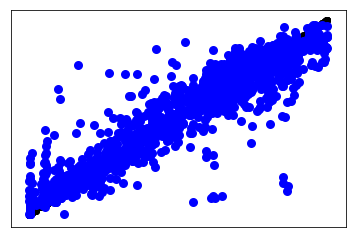

Número de dados de teste 1709


In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    df_todos[df_todos.columns[:15]], df_todos['peso'], test_size=0.33, random_state=42)
forest_todos = RandomForestRegressor(max_depth=10, random_state=0)
forest_todos.fit(X_train, y_train)
# Plotar estatísticas do modelo e projeção real x predição
reg_plot(forest_todos, X_test, y_test)
print('Número de dados de teste', len(X_test))

[1829  479 1741 1155  754 1652  293 4356 1531 1838 1622 3834 4274 1369
 4456 4244 1486 1266 1569 2873 3597  245 3064  569 2526  240 4414 1352
 3786 2084 1656 1352 3203 4624 1868 4794 2036 2764 1461 3508 1847]


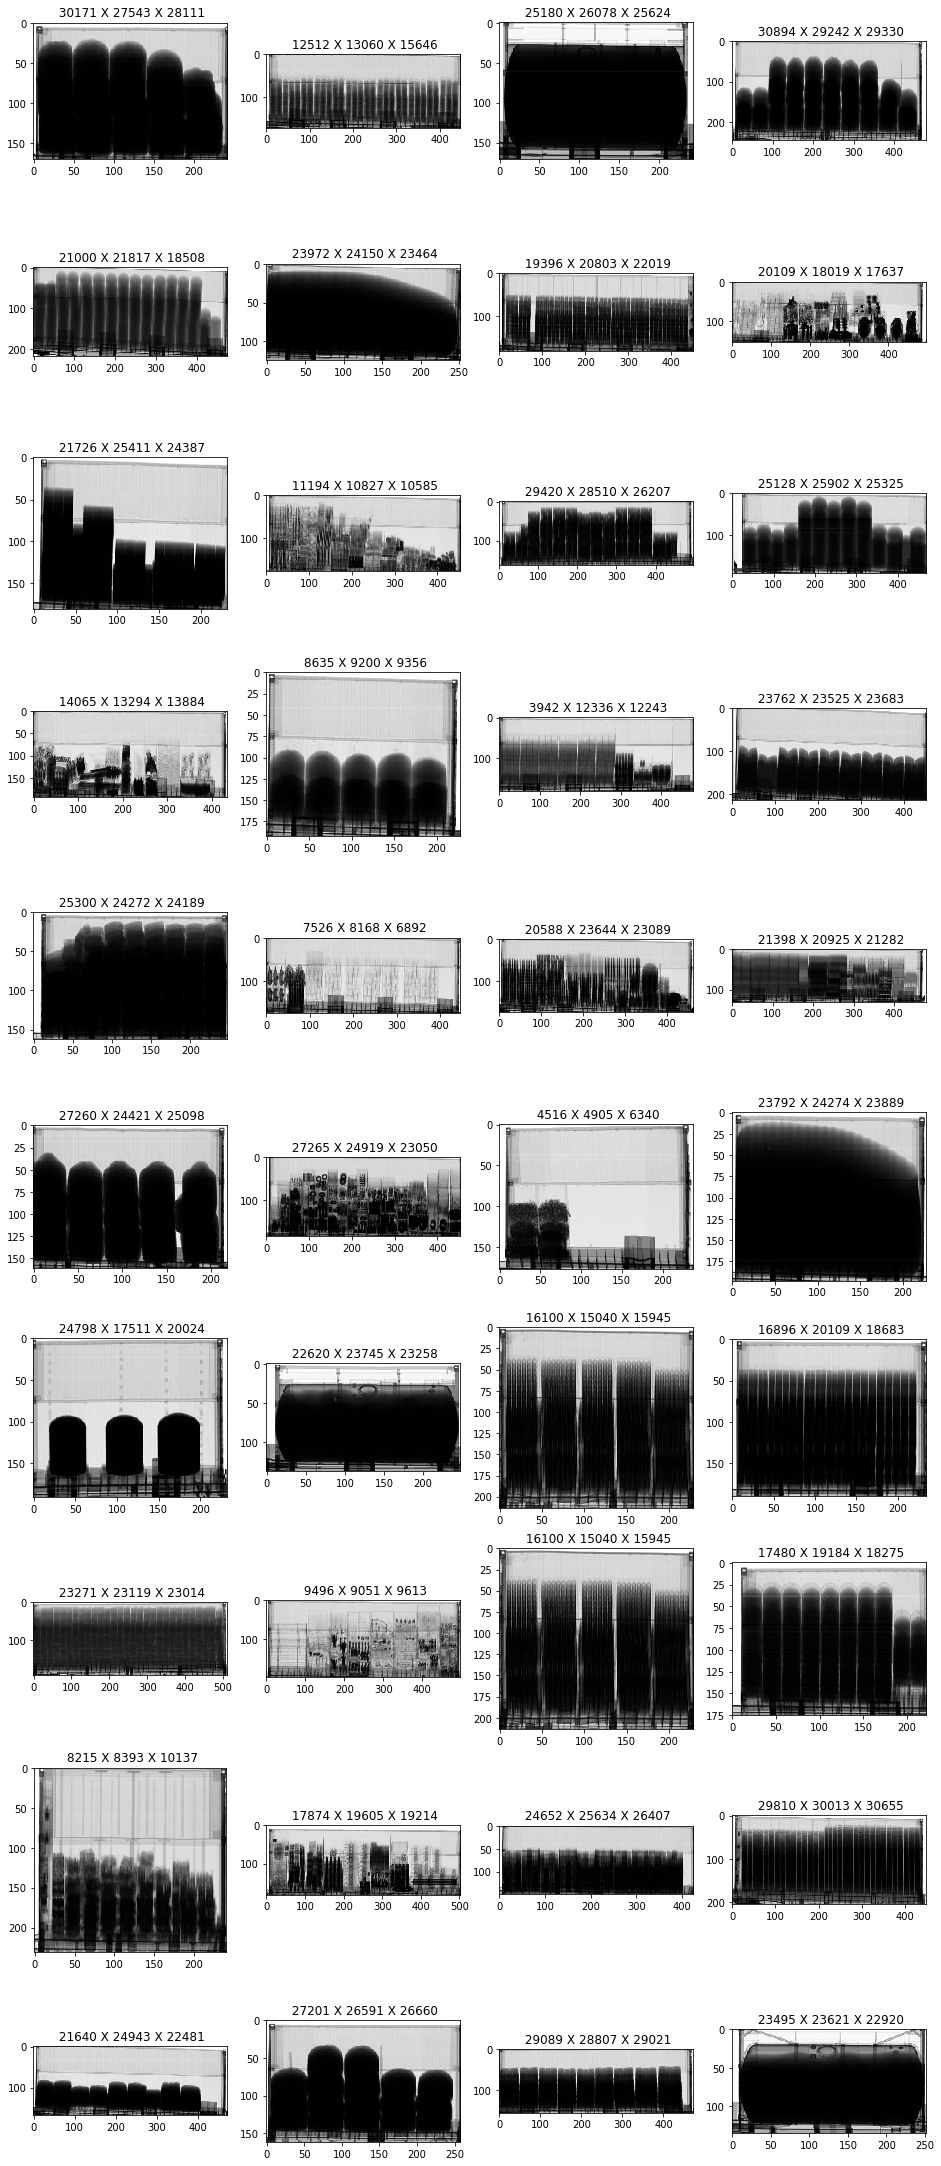

In [11]:
# Ver resultados na prática
fig=plt.figure(figsize=(16, 40))
columns = 4
rows = 10

indexes = np.random.randint(len(imagens) - 1, size=columns*rows + 1)
print(indexes)
random_histograms = [np.histogram(np.asarray(imagens[index][0]), bins=BINS)[0][:15] for index in indexes]
random_predicts = forest.predict(random_histograms)
random_predicts_2 = forest_todos.predict(random_histograms)
for i in range(1, columns*rows +1):
    img = imagens[indexes[i]][0]
    ax = fig.add_subplot(rows, columns, i)
    title = ' %d X %d X %d' % (df['peso'].iloc[indexes[i]],
                            random_predicts[i], random_predicts_2[i])
    ax.set(title=title )
    plt.imshow(img)
plt.show()

[229 249 333 234 355 203  83 295  75 330 278 243 277  34 353  55  69]


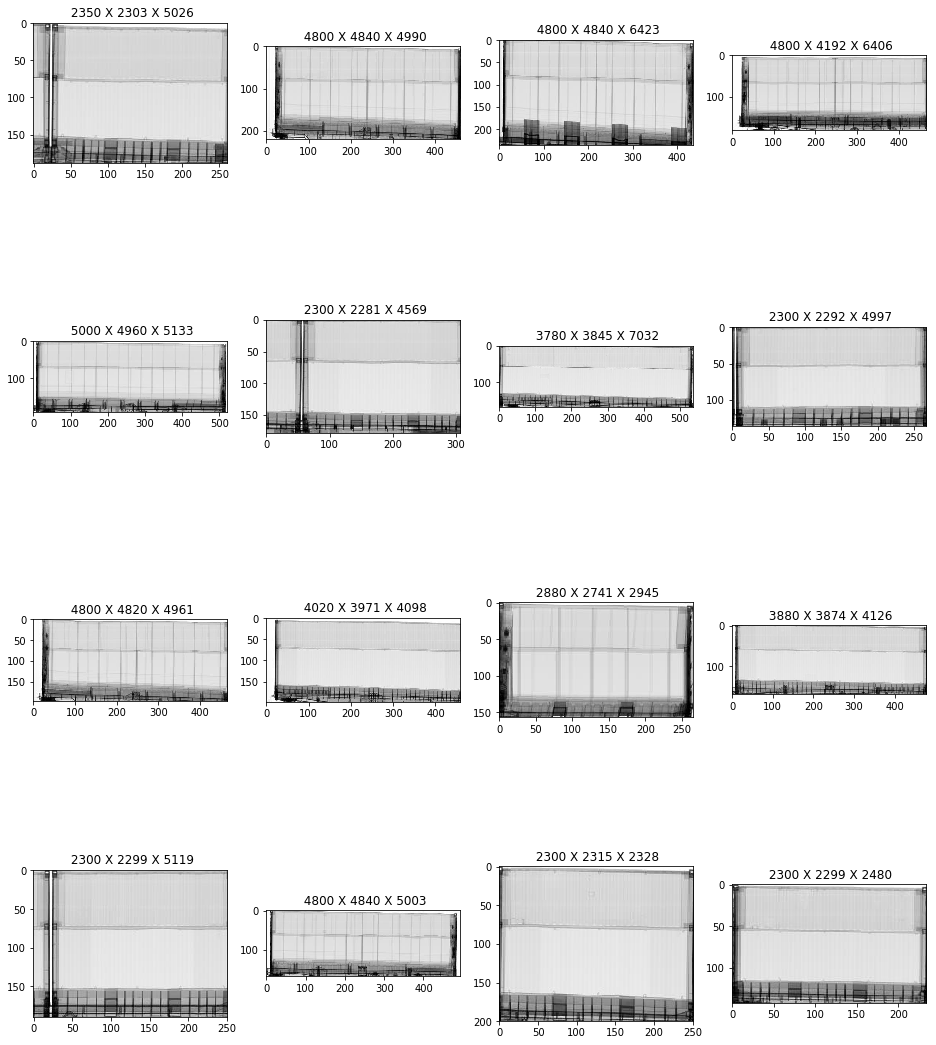

In [12]:
# Ver resultados na prática com contêineres vazios
# (Contêineres vazios usados no treinamento à parte)
fig=plt.figure(figsize=(16, 20))
columns = 4
rows = 4

indexes = np.random.randint(len(imagens_vazios) - 1, size=columns*rows + 1)
print(indexes)
random_histograms = [np.histogram(np.asarray(imagens_vazios[index][0]), bins=BINS)[0][:15] for index in indexes]
random_predicts = forest_vazios.predict(random_histograms)
random_predicts_2 = forest_todos.predict(random_histograms)
for i in range(1, columns*rows +1):
    img = imagens_vazios[indexes[i]][0]
    ax = fig.add_subplot(rows, columns, i)
    title = ' %d X %d X %d' % (df_vazios['peso'].iloc[indexes[i]],
                            random_predicts[i], random_predicts_2[i])

    ax.set(title=title )
    plt.imshow(img)
plt.show()

In [14]:
# Salvar resultados - MODELO TODOS!!!
from sklearn.externals import joblib
joblib.dump(forest_todos, 'ForestPeso.pkl')
with open('histo.npy', 'wb') as out:
    np.save(out, np.array(X_train))
with open('label.npy', 'wb') as out:
    np.save(out, y_train)


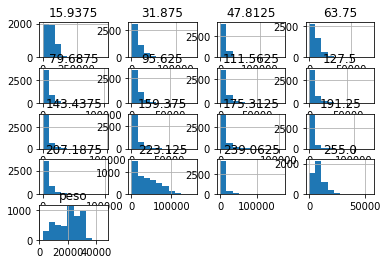

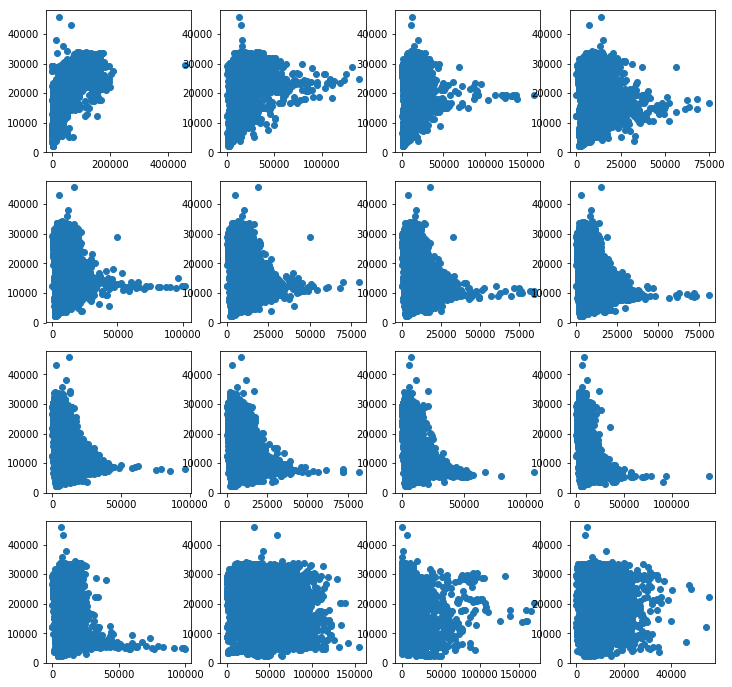

0 [[1.         0.79649534]
 [0.79649534 1.        ]]
1 [[1.         0.33670795]
 [0.33670795 1.        ]]
2 [[1.         0.09791046]
 [0.09791046 1.        ]]
3 [[ 1.         -0.08233031]
 [-0.08233031  1.        ]]
4 [[ 1.         -0.23068513]
 [-0.23068513  1.        ]]
5 [[ 1.         -0.34914339]
 [-0.34914339  1.        ]]
6 [[ 1.         -0.41708903]
 [-0.41708903  1.        ]]
7 [[ 1.         -0.48488954]
 [-0.48488954  1.        ]]
8 [[ 1.         -0.52802216]
 [-0.52802216  1.        ]]
9 [[ 1.         -0.55973507]
 [-0.55973507  1.        ]]
10 [[ 1.         -0.56093973]
 [-0.56093973  1.        ]]
11 [[ 1.         -0.54472098]
 [-0.54472098  1.        ]]
12 [[ 1.         -0.45742444]
 [-0.45742444  1.        ]]
13 [[ 1.         -0.19057393]
 [-0.19057393  1.        ]]
14 [[ 1.         -0.18050729]
 [-0.18050729  1.        ]]
15 [[1.         0.01052894]
 [0.01052894 1.        ]]


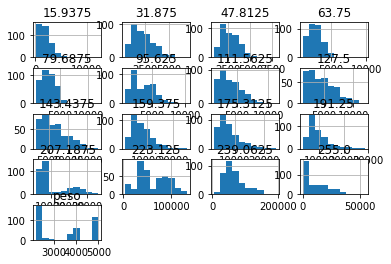

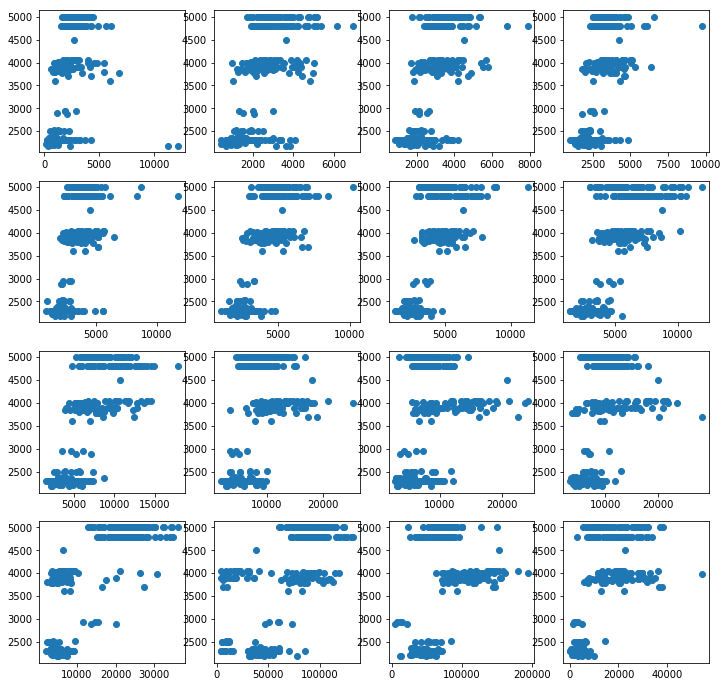

0 [[1.         0.53889561]
 [0.53889561 1.        ]]
1 [[1.         0.68418166]
 [0.68418166 1.        ]]
2 [[1.         0.66684815]
 [0.66684815 1.        ]]
3 [[1.         0.67579125]
 [0.67579125 1.        ]]
4 [[1.         0.70462792]
 [0.70462792 1.        ]]
5 [[1.         0.82245914]
 [0.82245914 1.        ]]
6 [[1.         0.77594969]
 [0.77594969 1.        ]]
7 [[1.         0.78569467]
 [0.78569467 1.        ]]
8 [[1.         0.77137022]
 [0.77137022 1.        ]]
9 [[1.         0.56751694]
 [0.56751694 1.        ]]
10 [[1.         0.43594337]
 [0.43594337 1.        ]]
11 [[1.         0.48635686]
 [0.48635686 1.        ]]
12 [[1.         0.78715335]
 [0.78715335 1.        ]]
13 [[1.         0.71123418]
 [0.71123418 1.        ]]
14 [[1.         0.48720421]
 [0.48720421 1.        ]]
15 [[1.         0.71182715]
 [0.71182715 1.        ]]


In [13]:
# Analisar relação entre faixas do histograma e pesos
from utils import df_plot

df_plot(df, None)
df_plot(df_vazios, None)